# Question 1

##  Given some sample data, write a program to answer the following

#### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shopifyData = pd.read_csv('shopify.csv')
shopifyData.head()

In [3]:
# To find the mistake we can break down the aov of each shop, to find if there is an outlier

shop_agg = shopifyData.groupby('shop_id')
shop_aov = shop_agg['order_amount'].sum()/shop_agg['order_id'].nunique()
shop_aov.sort_values(ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,13/03/17 12:36
1,2,92,925,90,1,cash,03/03/17 17:38
2,3,44,861,144,1,cash,14/03/17 4:23
3,4,18,935,156,1,credit_card,26/03/17 12:43
4,5,18,883,156,1,credit_card,01/03/17 4:35


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd299286100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd299286760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd299268df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd299286c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd299286f10>],
 'means': []}

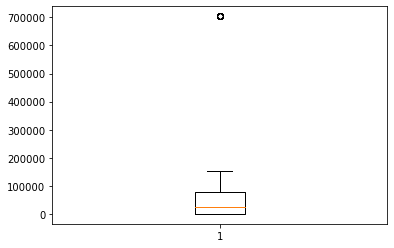

In [18]:
# Lets draw a boxplot to see order amount distribution

shopids = [42,78]
plt.boxplot(shopifyData[shopifyData.shop_id.isin(shopids)].order_amount)

In [19]:
# We can clearly see outltiers for the data which can be due to - error in order management system or bulk order placed by a reseller
# Sample of erroneous orders

shopifyData[shopifyData.order_amount>=700000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,07/03/17 4:00
60,61,42,607,704000,2000,credit_card,04/03/17 4:00
520,521,42,607,704000,2000,credit_card,02/03/17 4:00
1104,1105,42,607,704000,2000,credit_card,24/03/17 4:00
1362,1363,42,607,704000,2000,credit_card,15/03/17 4:00
1436,1437,42,607,704000,2000,credit_card,11/03/17 4:00
1562,1563,42,607,704000,2000,credit_card,19/03/17 4:00
1602,1603,42,607,704000,2000,credit_card,17/03/17 4:00
2153,2154,42,607,704000,2000,credit_card,12/03/17 4:00
2297,2298,42,607,704000,2000,credit_card,07/03/17 4:00


In [22]:
# We can see the user with user_id 607 is placing bulk orders of 2000 pairs multiple times across the two shops (42,78) 
# over the course of the month. Lets see the AOV after removing these orders

non_bulk_order_data = shopifyData[shopifyData.order_amount<=700000]
aov = non_bulk_order_data['order_amount'].sum()/non_bulk_order_data['order_id'].nunique()
print('AOV of non bulk orders = ' + str(aov))

AOV of non erroneous/bulk orders = 754.0919125025085


b.	What metric would you report for this dataset?

We know that there is only one model of sneakers sold across different shops. If we want to report a metric unaffected by bulk orders, 
we can look at the following:

Breadth metrics - Total Revenue, Average Daily Orders, Total Shoes Sold;
Depth Metrics - Average Orders per shop


c.	What is its value?

In [30]:
tr = shopifyData['order_amount'].sum()
print('Total Revenue = ' + str(tr))

ado = shopifyData['order_id'].nunique()/ pd.to_datetime(shopifyData['created_at']).dt.date.nunique()
print('Average daily Orders = ' +str(ado))

tss = shopifyData['total_items'].sum()
print('Total Shoes Sold = ' + str(tss))

sao = shopifyData['order_id'].nunique()/shopifyData['shop_id'].nunique()
print('Average Orders per Shop = '+ str(sao))

Total Revenue = 15725640
Average daily Orders = 166.66666666666666
Total Shoes Sold = 43936
Average Orders per Shop = 50.0


# Question 2

## For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a.	How many orders were shipped by Speedy Express in total?

SELECT COUNT(DISTINCT OrderId) 
FROM Orders 
WHERE ShipperID = (SELECT ShipperID FROM Shippers WHERE ShipperName = 'Speedy Express');

OUTPUT - 54

b.	What is the last name of the employee with the most orders?

SELECT LastName 
FROM Employees 
where EmployeeID =
(SELECT EmployeeID FROM Orders GROUP BY EmployeeID order by COUNT(DISTINCT OrderID) DESC LIMIT 1) ;

OUTPUT - Peacock

c.	What product was ordered the most by customers in Germany?

SELECT Prod.ProductName
FROM Products Prod
LEFT JOIN OrderDetails OrdDet on Prod.ProductID = OrdDet.ProductID
LEFT JOIN Orders Ord on OrdDet.OrderID = Ord.OrderID
LEFT JOIN Customers Cust on Ord.CustomerID = Cust.CustomerID
WHERE Cust.Country = 'Germany'
GROUP BY Prod.ProductName
ORDER BY sum(OrdDet.Quantity) DESC
LIMIT 1

OUTPUT - Boston Crab Meat